# 多层感知机测试效果

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import torch
from torch import nn
from d2l import torch as d2l
from Model import *
from Trainer import *
from torchinfo import summary
import os

### 加载数据

In [2]:
mydir = os.getcwd() + '\\data01'

# 读取本地文件
train_features = torch.load('{}/train_features.pt'.format(mydir))
test_features = torch.load('{}/test_features.pt'.format(mydir))
train_labels = torch.load('{}/train_labels.pt'.format(mydir))
test_data = pd.read_csv('{}/test_data.csv'.format(mydir))

In [3]:
print("train_features.shape: ", train_features.shape)
print("test_features.shape: ", test_features.shape)
print("train_labels.shape: ", train_labels.shape)
print("test_data.shape: ", test_data.shape)

train_features.shape:  torch.Size([1460, 331])
test_features.shape:  torch.Size([1459, 331])
train_labels.shape:  torch.Size([1460, 1])
test_data.shape:  (1459, 81)


### 定义损失函数

In [4]:
def squared_loss(preds, labels):  #@save
    """均方损失。"""
    return (preds - labels.reshape(preds.shape)) ** 2

def log_rmse(preds, labels):  #@save
    """对数均方根误差。"""
    return squared_loss(torch.log(preds+1), torch.log(labels+1)).mean()

In [5]:
# 定义超参数
learning_rate = 0.01 # 学习率
input_size = train_features.shape[-1]
hidden_size = 256
output_size = 1
# model=MLP2_batchnorm(input_size, hidden_size, output_size) 过于简单的模型不需要用batchnorm因为深度还不够
model=MLP2(input_size, hidden_size, output_size)
loss_fn=log_rmse
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) # Adam优化器
# optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate) # 随机梯度下降优化器，学习率为0.01

In [6]:
summary(model, input_size=(64,331))

Layer (type:depth-idx)                   Output Shape              Param #
MLP2                                     [64, 1]                   --
├─Linear: 1-1                            [64, 256]                 84,992
├─ReLU: 1-2                              [64, 256]                 --
├─Linear: 1-3                            [64, 1]                   257
Total params: 85,249
Trainable params: 85,249
Non-trainable params: 0
Total mult-adds (M): 5.46
Input size (MB): 0.08
Forward/backward pass size (MB): 0.13
Params size (MB): 0.34
Estimated Total Size (MB): 0.56

In [7]:
mytrainer = Trainer(
    model= model, # 模型
    X=train_features, # 特征
    y=train_labels, # 标签
    num_epochs=200, # 迭代次数
    batch_size=16, # 批次大小为16
    loss_fn= loss_fn, # 损失函数
    optimizer= optimizer, # 优化器
    n_splits=5, # 子集个数
    is_print=True,
    print_every=20
)

In [8]:
mytrainer.train()

Fold 0
Epoch | 20/200 | Train Loss: 1.5181 | Test Loss: 1.6142
Epoch | 40/200 | Train Loss: 0.2885 | Test Loss: 0.3029
Epoch | 60/200 | Train Loss: 0.0813 | Test Loss: 0.0784
Epoch | 80/200 | Train Loss: 0.0368 | Test Loss: 0.0320
Epoch | 100/200 | Train Loss: 0.0249 | Test Loss: 0.0212
Epoch | 120/200 | Train Loss: 0.0202 | Test Loss: 0.0178
Epoch | 140/200 | Train Loss: 0.0173 | Test Loss: 0.0162
Epoch | 160/200 | Train Loss: 0.0153 | Test Loss: 0.0156
Epoch | 180/200 | Train Loss: 0.0140 | Test Loss: 0.0157
Epoch | 200/200 | Train Loss: 0.0131 | Test Loss: 0.0162
Fold 1
Epoch | 20/200 | Train Loss: 0.2278 | Test Loss: 0.2606
Epoch | 40/200 | Train Loss: 0.0581 | Test Loss: 0.0693
Epoch | 60/200 | Train Loss: 0.0303 | Test Loss: 0.0353
Epoch | 80/200 | Train Loss: 0.0227 | Test Loss: 0.0264
Epoch | 100/200 | Train Loss: 0.0187 | Test Loss: 0.0225
Epoch | 120/200 | Train Loss: 0.0162 | Test Loss: 0.0206
Epoch | 140/200 | Train Loss: 0.0145 | Test Loss: 0.0196
Epoch | 160/200 | Train L

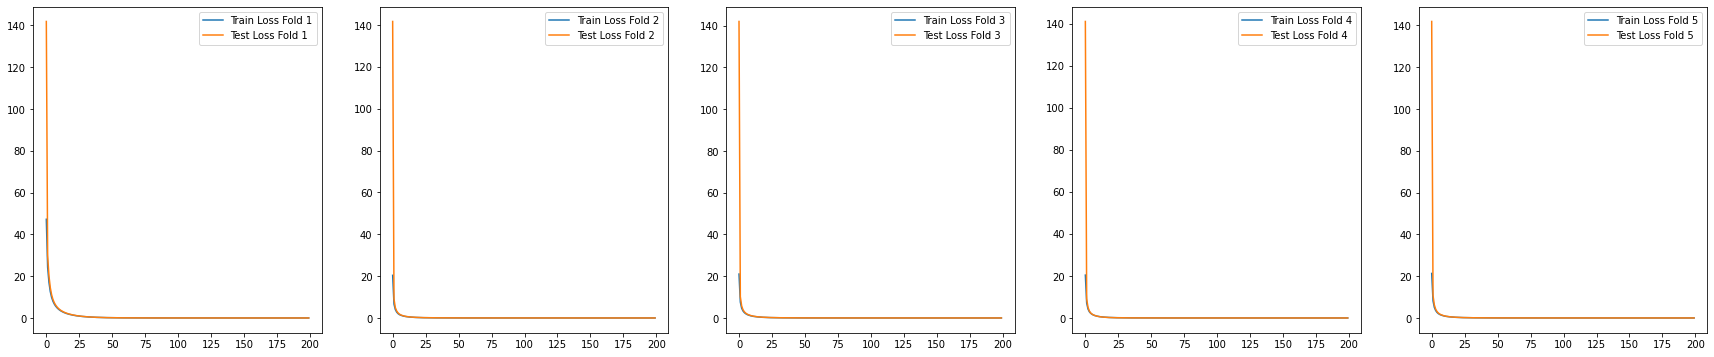

In [9]:
mytrainer.visualize()

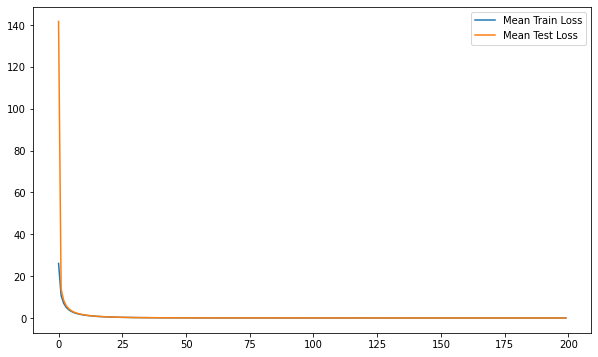

In [10]:
mytrainer.plot_mean_loss()

In [11]:
print("last mean test loss",mytrainer.mean_test_losses[-1])

last mean test loss 0.017883501018155112


#### 主要指标看这

In [12]:
print("The most possible score is ",np.sqrt(mytrainer.mean_test_losses[-1]))

The most possible score is  0.13372920779753059


In [13]:
preds = mytrainer.predict(test_features)
print("preds.shape: ", preds.shape)
print("preds[:10]: ", preds[:10])

preds.shape:  torch.Size([1459])
preds[:10]:  tensor([123489.4922, 164922.0781, 180488.8125, 194454.2188, 189130.1562,
        168005.7500, 176299.9375, 159038.6562, 187212.7969, 120343.5391])


In [14]:
test_features[:5]

tensor([[-0.8735,  0.4581,  0.1843,  ...,  1.0000,  0.0000,  0.0000],
        [-0.8735,  0.5009,  0.5197,  ...,  1.0000,  0.0000,  0.0000],
        [ 0.0673,  0.2011,  0.4643,  ...,  1.0000,  0.0000,  0.0000],
        [ 0.0673,  0.3724, -0.0241,  ...,  1.0000,  0.0000,  0.0000],
        [ 1.4785, -1.1268, -0.6546,  ...,  1.0000,  0.0000,  0.0000]])

In [15]:
train_features[:5]

tensor([[ 0.0673, -0.1844, -0.2178,  ...,  1.0000,  0.0000,  0.0000],
        [-0.8735,  0.4581, -0.0720,  ...,  1.0000,  0.0000,  0.0000],
        [ 0.0673, -0.0559,  0.1372,  ...,  1.0000,  0.0000,  0.0000],
        [ 0.3025, -0.3986, -0.0784,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0673,  0.6294,  0.5188,  ...,  1.0000,  0.0000,  0.0000]])

In [16]:
train_preds = mytrainer.predict(train_features)

In [17]:
print("train_preds[:10]: \n", train_preds[:10])
print("train_labels[:10]: \n", train_labels[:10])

train_preds[:10]: 
 tensor([206548.0938, 193949.4219, 209760.9844, 169365.4688, 273851.8125,
        150645.2188, 276531.2812, 219338.6719, 134081.8750, 119344.9766])
train_labels[:10]: 
 tensor([[208500.],
        [181500.],
        [223500.],
        [140000.],
        [250000.],
        [143000.],
        [307000.],
        [200000.],
        [129900.],
        [118000.]])


In [18]:
# test_data['SalePrice'] = pd.Series(preds.reshape(1, -1)[0])
# submission = pd.concat([test_data['Id'], test_data['SalePrice']], axis=1)
# submission.to_csv('submission_relu_mlp_hidden400.csv', index=False)

用了mlp和relu作为激活函数，结果比用sigmoid或者之前单纯的线性函数要好很多

![sub2](submission2.png)